In [1]:
#!/usr/bin/env python
# coding: utf-8

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import random

np.random.seed(1234)
random.seed(1234)


############################################################3
''' Input file '''
path_to_experiment="../simulator/log/6d9c26b9-static_autoscaler/three_depth/"
############################################################3


routing_algorithm = ["RoundRobin-LCLB", "RoundRobin-MCLB", "RoundRobin-heuristic_TE"]
cluster_id = [0, 1]

marker_list = ['d', 'o', 'x', 'v', '^', '<', '>', 's', '8', 'p']
color_list = [ "purple","orange", "green", "brown", "cyan", "#C20078", "#FAC205", "gray","#FBDD7E", "#06C2AC", "#FFFF14", "#E6DAA6","olive", "#76FF7B", "pink", "#BC8F6", "#AAA662"]


def get_svc_list(f_):
    df = pd.read_csv(f_)
    svc_list = df["service"].unique()
    return svc_list

def calc_resource_usage(files):
    assert len(routing_algorithm) == len(files)
    df_list = list()
    for i in range(len(routing_algorithm)):
        routing = routing_algorithm[i]
        df = pd.read_csv(files[i])
        df["routing"] = [routing]*len(df) # add new column
        df_list.append(df)
    df = pd.concat(df_list, axis=0)
    df = df.reset_index(drop=True)
    # display(df)
    # print(len(df))
    
    df_usage = pd.DataFrame(columns=["svc", "cluster_id", "routing", "num_replica", "capacity"])
    svc_list = df["service"].unique()
    for cid in cluster_id:
        for routing in routing_algorithm:
            for svc in svc_list:
                temp_df = df[df["routing"] == routing]
                temp_df = temp_df[temp_df["service"] == svc]
                temp_df = temp_df[temp_df["cluster_id"] == cid]
                temp_df = temp_df.reset_index(drop=True)
                capa = 0
                num_repl = 0
                for i in range(len(temp_df)-1):
                    temp_df.loc[i, "timestamp"]
                    duration = (temp_df.loc[i+1, "timestamp"] - temp_df.loc[i, "timestamp"])
                    num_repl += duration * temp_df.loc[i,"num_replica"]
                    capa += duration * temp_df.loc[i,"capacity"]
                df_usage.loc[len(df_usage)] = [svc, cid, routing, num_repl, capa]
    df_usage = df_usage.sort_values(by=["svc", "cluster_id", "routing"])
    df_usage = df_usage.reset_index(drop=True)
    num_repl_norm_list = list()
    capa_norm_list = list()
    for svc in svc_list:
        temp_df = df_usage[df_usage["cluster_id"]==0]
        temp_df = temp_df[temp_df["svc"]==svc]
        temp_df = temp_df[temp_df["routing"]==routing_algorithm[0]]
        lclb_num_repl = float(temp_df["num_replica"])
        lclb_capa = float(temp_df["capacity"])
        num = len(cluster_id)*len(routing_algorithm)
        for _ in range(num):
            num_repl_norm_list.append(lclb_num_repl)
            capa_norm_list.append(lclb_capa)
    assert len(num_repl_norm_list) == len(df_usage)
    assert len(capa_norm_list) == len(df_usage)
    normalized_num_replica = list()
    normalized_capa= list()

    print("num_repl_norm_list")
    for i in range(len(num_repl_norm_list)):
        if (i+1)%3 == 0:
            print(num_repl_norm_list[i])
        else:
            print(num_repl_norm_list[i], end=", ")

    for i in range(len(df_usage)):
        nnrepl = df_usage.loc[i,"num_replica"]/num_repl_norm_list[i]
        ncapa = df_usage.loc[i,"capacity"]/capa_norm_list[i]
        normalized_num_replica.append(nnrepl)
        normalized_capa.append(ncapa)
    df_usage["norm_num_replica"] = normalized_num_replica
    df_usage["norm_capacity"] = normalized_capa
    display(df_usage)
    return df_usage, df
    

num_repl_norm_list
289905000.0, 289905000.0, 289905000.0
289905000.0, 289905000.0, 289905000.0
215650000.0, 215650000.0, 215650000.0
215650000.0, 215650000.0, 215650000.0
717870000.0, 717870000.0, 717870000.0
717870000.0, 717870000.0, 717870000.0
1256345000.0, 1256345000.0, 1256345000.0
1256345000.0, 1256345000.0, 1256345000.0
1414665000.0, 1414665000.0, 1414665000.0
1414665000.0, 1414665000.0, 1414665000.0
471610000.0, 471610000.0, 471610000.0
471610000.0, 471610000.0, 471610000.0


,svc,cluster_id,routing,num_replica,capacity,norm_num_replica,norm_capacity
0,A,0,RoundRobin-LCLB,289905000,9.663500e+09,1.000000,1.000000
1,A,0,RoundRobin-MCLB,293250000,9.775000e+09,1.011538,1.011538
2,A,0,RoundRobin-heuristic_TE,287750000,9.591667e+09,0.992567,0.992567
3,A,1,RoundRobin-LCLB,167125000,5.570833e+09,0.576482,0.576482
4,A,1,RoundRobin-MCLB,170275000,5.675833e+09,0.587348,0.587348
5,A,1,RoundRobin-heuristic_TE,169240000,5.641333e+09,0.583777,0.583777
6,B,0,RoundRobin-LCLB,215650000,2.156500e+10,1.000000,1.000000
7,B,0,RoundRobin-MCLB,191845000,1.918450e+10,0.889613,0.889613
8,B,0,RoundRobin-heuristic_TE,200605000,2.006050e+10,0.930234,0.930234
9,B,1,RoundRobin-LCLB,86170000,8.617000e+09,0.399583,0.399583


,svc,cluster_id,routing,num_replica,capacity,norm_num_replica,norm_capacity
0,A,0,RoundRobin-LCLB,289905000,9.663500e+09,1.000000,1.000000
3,A,1,RoundRobin-LCLB,167125000,5.570833e+09,0.576482,0.576482
6,B,0,RoundRobin-LCLB,215650000,2.156500e+10,1.000000,1.000000
9,B,1,RoundRobin-LCLB,86170000,8.617000e+09,0.399583,0.399583
12,C,0,RoundRobin-LCLB,717870000,2.871480e+10,1.000000,1.000000
15,C,1,RoundRobin-LCLB,129280000,5.171200e+09,0.180088,0.180088
18,D,0,RoundRobin-LCLB,1256345000,3.140862e+10,1.000000,1.000000
21,D,1,RoundRobin-LCLB,215455000,5.386375e+09,0.171493,0.171493
24,E,0,RoundRobin-LCLB,1414665000,4.715550e+10,1.000000,1.000000
27,E,1,RoundRobin-LCLB,172330000,5.744333e+09,0.121817,0.121817


,svc,cluster_id,routing,num_replica,capacity,norm_num_replica,norm_capacity
1,A,0,RoundRobin-MCLB,293250000,9.775000e+09,1.011538,1.011538
4,A,1,RoundRobin-MCLB,170275000,5.675833e+09,0.587348,0.587348
7,B,0,RoundRobin-MCLB,191845000,1.918450e+10,0.889613,0.889613
10,B,1,RoundRobin-MCLB,88960000,8.896000e+09,0.412520,0.412520
13,C,0,RoundRobin-MCLB,680495000,2.721980e+10,0.947936,0.947936
16,C,1,RoundRobin-MCLB,238445000,9.537800e+09,0.332156,0.332156
19,D,0,RoundRobin-MCLB,1238530000,3.096325e+10,0.985820,0.985820
22,D,1,RoundRobin-MCLB,490845000,1.227112e+10,0.390693,0.390693
25,E,0,RoundRobin-MCLB,1074205000,3.580683e+10,0.759335,0.759335
28,E,1,RoundRobin-MCLB,638625000,2.128750e+10,0.451432,0.451432


,svc,cluster_id,routing,num_replica,capacity,norm_num_replica,norm_capacity
2,A,0,RoundRobin-heuristic_TE,287750000,9.591667e+09,0.992567,0.992567
5,A,1,RoundRobin-heuristic_TE,169240000,5.641333e+09,0.583777,0.583777
8,B,0,RoundRobin-heuristic_TE,200605000,2.006050e+10,0.930234,0.930234
11,B,1,RoundRobin-heuristic_TE,92710000,9.271000e+09,0.429910,0.429910
14,C,0,RoundRobin-heuristic_TE,639840000,2.559360e+10,0.891303,0.891303
17,C,1,RoundRobin-heuristic_TE,169750000,6.790000e+09,0.236463,0.236463
20,D,0,RoundRobin-heuristic_TE,1174230000,2.935575e+10,0.934640,0.934640
23,D,1,RoundRobin-heuristic_TE,320590000,8.014750e+09,0.255177,0.255177
26,E,0,RoundRobin-heuristic_TE,1054550000,3.515167e+10,0.745442,0.745442
29,E,1,RoundRobin-heuristic_TE,298015000,9.933833e+09,0.210661,0.210661


RoundRobin-LCLB: 5222575000
RoundRobin-MCLB: 5750225000
RoundRobin-heuristic_TE: 4927365000


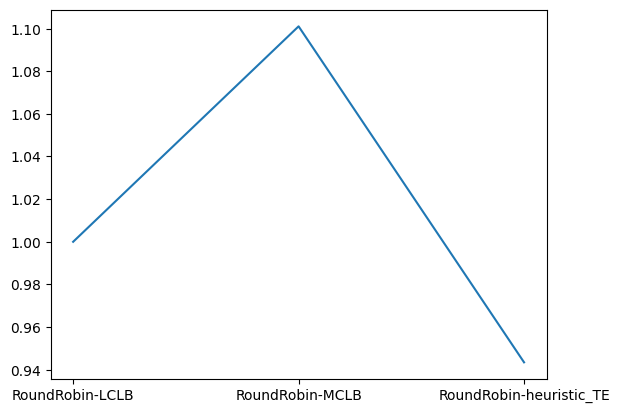

In [2]:
''' Get summary of resource usage '''
files = list()
for routing in routing_algorithm:
    f_ = path_to_experiment + routing + "/resource_provisioing_log.csv"
    svc_list = get_svc_list(f_)
    files.append(f_)
df_usage, df = calc_resource_usage(files)

''' total resource usage calculation'''
total_sum = list()
for routing in routing_algorithm:
    display(df_usage[df_usage["routing"] == routing])
    total_sum.append(df_usage[df_usage["routing"] == routing]["num_replica"].sum())

for i in range(len(routing_algorithm)):
    print("{}: {}".format(routing_algorithm[i], total_sum[i]))

norm_total_sum = [x/total_sum[0] for x in total_sum]
plt.plot(routing_algorithm, norm_total_sum)
plt.show()



['A0', 'A1', 'B0', 'B1', 'C0', 'C1', 'D0', 'D1', 'E0', 'E1', 'F0', 'F1']


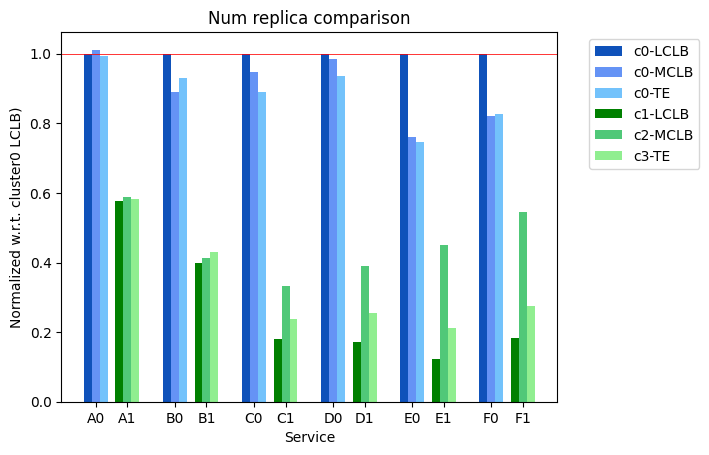

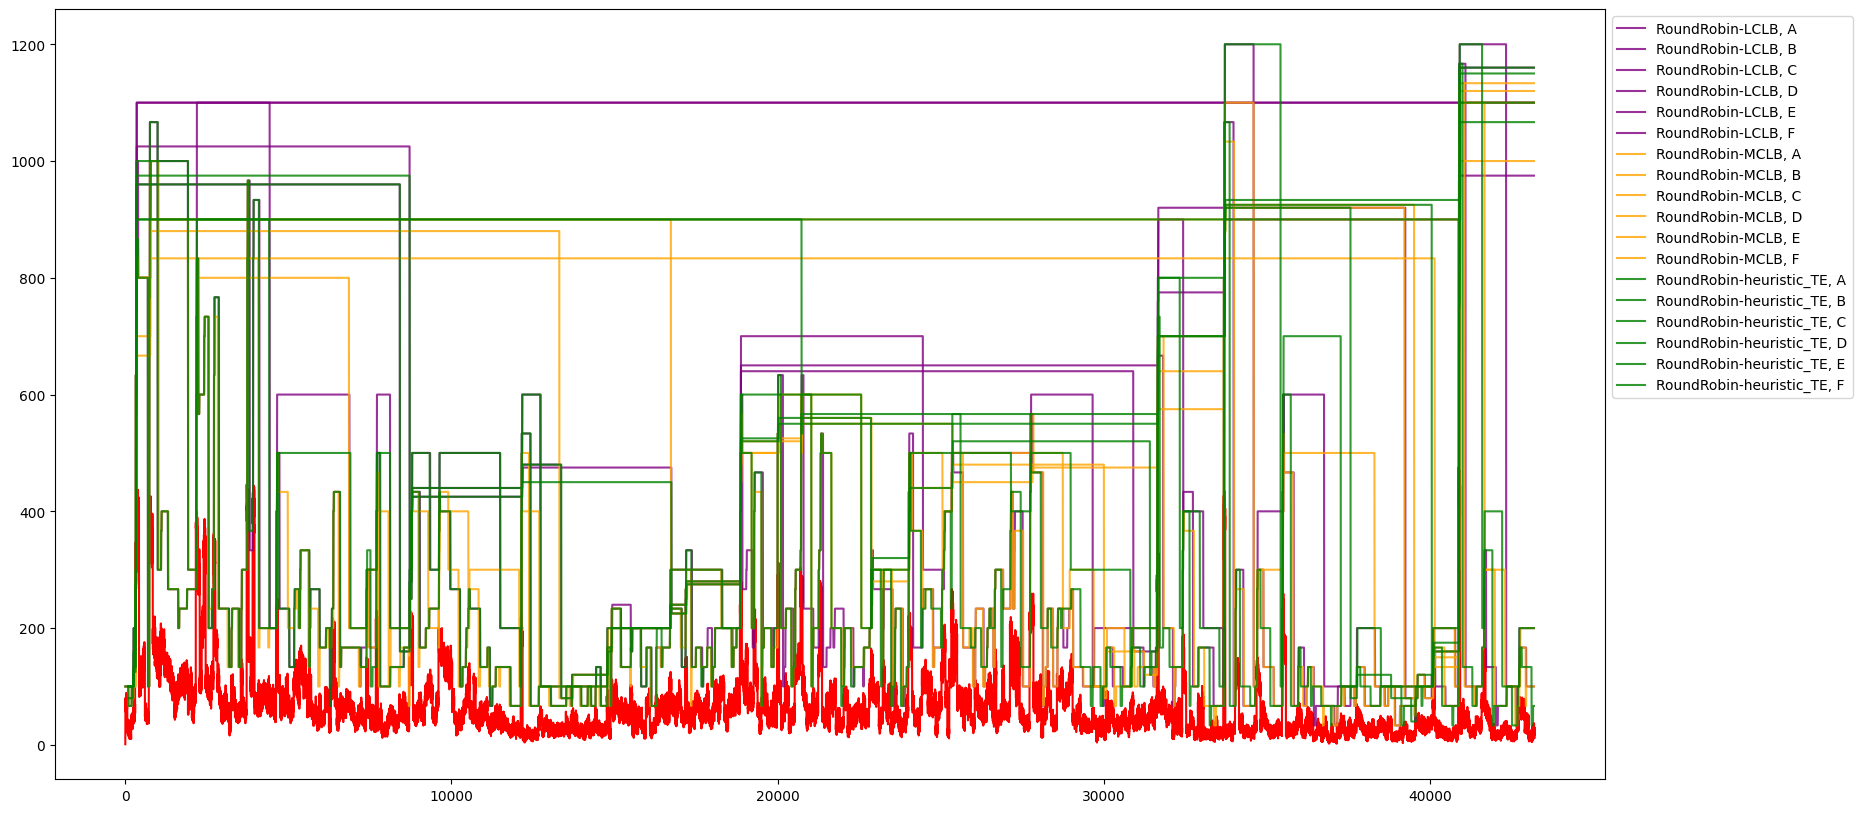

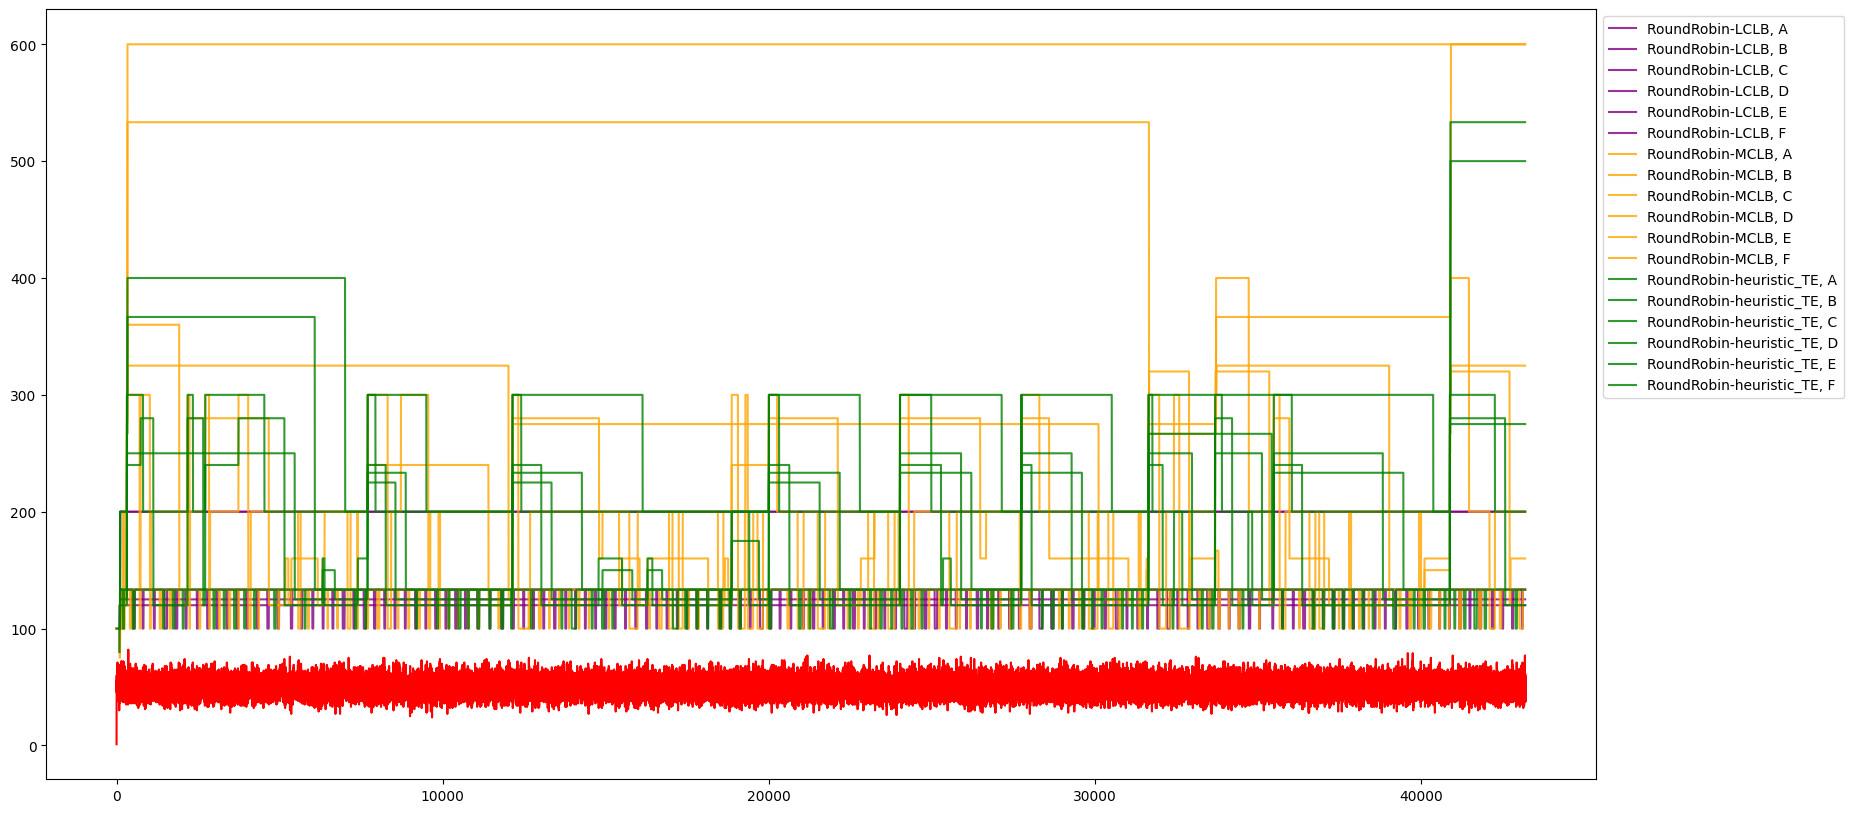

In [3]:

blue_color = ['#0F52BA', '#6593F5', '#73C2FB']
green_color = ['#008000', '#50C878', '#90EE90']
bar_width = 0.1
x = np.arange(len(svc_list))

## num replica
plt.bar(x - 5*bar_width, df_usage[(df_usage["cluster_id"]==0) & (df_usage["routing"]==routing_algorithm[0])]["norm_num_replica"], width=bar_width, color=blue_color[0], label='c0-LCLB')
plt.bar(x - 4*bar_width, df_usage[(df_usage["cluster_id"]==0) & (df_usage["routing"]==routing_algorithm[1])]["norm_num_replica"], width=bar_width, color=blue_color[1], label='c0-MCLB')
plt.bar(x - 3*bar_width, df_usage[(df_usage["cluster_id"]==0) & (df_usage["routing"]==routing_algorithm[2])]["norm_num_replica"], width=bar_width, color=blue_color[2], label='c0-TE')
plt.bar(x - 1*bar_width, df_usage[(df_usage["cluster_id"]==1) & (df_usage["routing"]==routing_algorithm[0])]["norm_num_replica"], width=bar_width, color=green_color[0], label='c1-LCLB')
plt.bar(x - 0*bar_width, df_usage[(df_usage["cluster_id"]==1) & (df_usage["routing"]==routing_algorithm[1])]["norm_num_replica"], width=bar_width, color=green_color[1], label='c2-MCLB')
plt.bar(x + 1*bar_width, df_usage[(df_usage["cluster_id"]==1) & (df_usage["routing"]==routing_algorithm[2])]["norm_num_replica"], width=bar_width, color=green_color[2], label='c3-TE')

plt.axhline(1, linewidth=0.7, alpha=0.8, color="red")
xt_label = list()
for svc in svc_list:
    for cid in cluster_id:
        xt_label.append(svc+str(cid))
print(xt_label)
xt = list()
for i in x:
    xt.append(i-bar_width*4)
    xt.append(i)
plt.xticks(xt, xt_label)
plt.xlabel('Service')
plt.ylabel('Normalized w.r.t. cluster0 LCLB)')
plt.title('Num replica comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# ## capacity
# green_color = ['#008000', '#50C878', '#90EE90']
# plt.bar(x - 5*bar_width, df_usage[(df_usage["cluster_id"]==0) & (df_usage["routing"]==routing_algorithm[0])]["norm_capacity"], width=bar_width, color=cl[0], label='c0-LCLB')
# plt.bar(x - 4*bar_width, df_usage[(df_usage["cluster_id"]==0) & (df_usage["routing"]==routing_algorithm[1])]["norm_capacity"], width=bar_width, color=cl[1], label='c0-MCLB')
# plt.bar(x - 3*bar_width, df_usage[(df_usage["cluster_id"]==0) & (df_usage["routing"]==routing_algorithm[2])]["norm_capacity"], width=bar_width, color=cl[2], label='c0-TE')
# plt.bar(x - 1*bar_width, df_usage[(df_usage["cluster_id"]==1) & (df_usage["routing"]==routing_algorithm[0])]["norm_capacity"], width=bar_width, color=cl[0],  label='c1-LCLB')
# plt.bar(x - 0*bar_width, df_usage[(df_usage["cluster_id"]==1) & (df_usage["routing"]==routing_algorithm[1])]["norm_capacity"], width=bar_width, color=cl[1], label='c2-MCLB')
# plt.bar(x + 1*bar_width, df_usage[(df_usage["cluster_id"]==1) & (df_usage["routing"]==routing_algorithm[2])]["norm_capacity"], width=bar_width, color=cl[2], label='c3-TE')
# plt.xticks(x, svc_list)
# plt.xlabel('Service')
# plt.ylabel('Capacity (normalized w.r.t. LCLB)')
# plt.title('Capacity comparison')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()


def request_arrival_to_rps(req_arr):
    rps_list = list()
    rps = 0
    window = 0
    for i in range(len(req_arr)):
        rps += 1
        if req_arr[i] >= 1000*window:
            rps_list.append(rps)                    
            rps = 0
            window += 1
    return rps_list

input_path = "../simulator/log/6d9c26b9/three_depth/RoundRobin-LCLB/"
for cid in cluster_id:
    file_ = open(input_path+"request_arrival-cluster_"+str(cid)+".txt", 'r')
    data = file_.readlines()
    req_arr = list()
    for elem in data:
        req_arr.append(float(elem.strip()))
    rps = request_arrival_to_rps(req_arr)
    plt.figure(figsize=(20, 10))
    plt.plot(rps, color="red")
    marekr_idx = 0
    for routing in routing_algorithm:
    # for routing in ["RoundRobin-MCLB", "RoundRobin-heuristic_TE"]:
    # for routing in ["RoundRobin-heuristic_TE"]:
        for svc in svc_list:
        # for svc in "A":
            temp_df = df[df["cluster_id"]==cid]
            temp_df = temp_df[temp_df["routing"]==routing]
            temp_df = temp_df[temp_df["service"]==svc]
            ts = [x/1000 for x in temp_df["timestamp"]]
            plt.plot(ts,temp_df["capacity"].to_list(), color=color_list[marekr_idx], label=routing + ", " + svc, alpha=0.8)
        marekr_idx += 1
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    # plt.savefig("temp.pdf", dpi=100, bbox_inches='tight')
    plt.show()